In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from src.retriever import get_embeddings_for_target_text, search_and_filter_similar_vectors
from src.utils import connect_and_load_milvus_collection

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from src.retriever import *

from src.embeddings_pca import (make_pyplot_plots, get_pca_for_knowledgebase, make_sns_plot, 
                                get_convex_hull_hypervolume_per_embeddingmodel, 
                                plot_cumulative_explained_variance,plot_semantic_hyper_volume_per_text, 
                                normalize_per_token_size, plot_semantic_hyper_volume_per_text_plotly)

from tqdm import tqdm

from math import log, sqrt

import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull


texts = ["Bible_NT", "Quran", "Torah", "Gita", "Analects"]  # "Bible",
encoder_models = ["jina_clip_v1","all_MiniLM_L6_v2" ]
parameters = [0.5, 0.75]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
encoder_models = ["all_MiniLM_L6_v2", "jina_clip_v1"]

all_embeddings_df, pca_dfs, explained_variances = get_pca_for_knowledgebase(texts, encoder_models, 2)

E1022 15:18:01.012405000 11359842304 tcp_posix.cc:597]                 recvmsg encountered uncommon error: Message too long


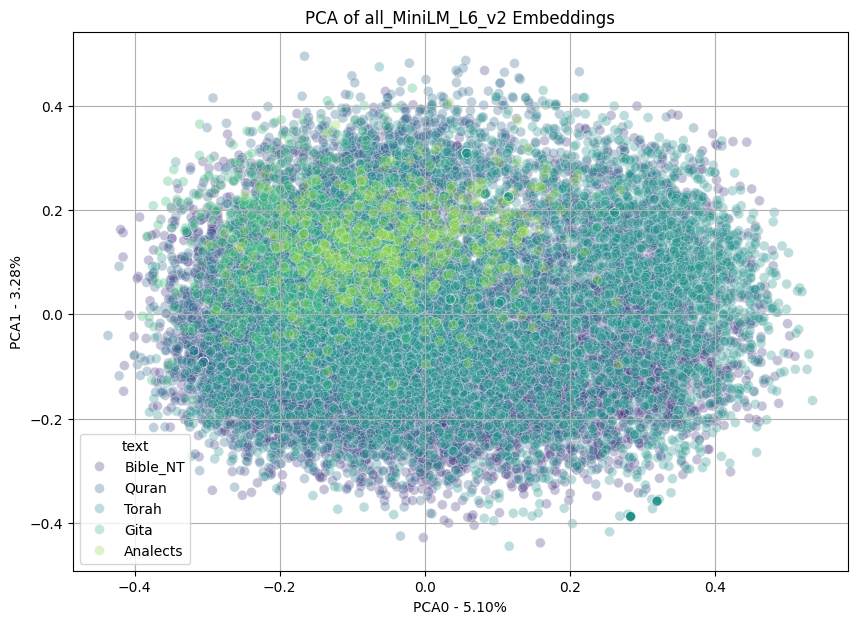

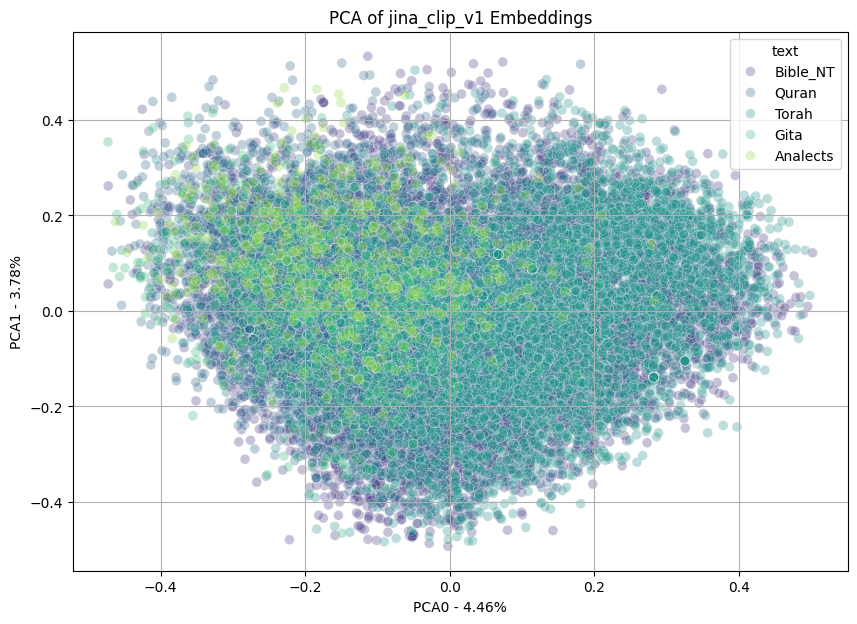

In [20]:
for encoder_model in encoder_models:
    make_sns_plot(pca_dfs, explained_variances, encoder_model)

In [21]:
make_pyplot_plots(pca_dfs, explained_variances, encoder_models)

{'all_MiniLM_L6_v2':            PCA0      PCA1      text
 0      0.172045 -0.064413  Bible_NT
 1      0.352393 -0.013439  Bible_NT
 2      0.188686  0.115959  Bible_NT
 3      0.156986  0.289550  Bible_NT
 4      0.225669  0.268132  Bible_NT
 ...         ...       ...       ...
 21142 -0.053637  0.198119  Analects
 21143 -0.137251  0.059352  Analects
 21144  0.008632  0.225182  Analects
 21145 -0.227754  0.245547  Analects
 21146 -0.287957  0.007039  Analects
 
 [21147 rows x 3 columns],
 'jina_clip_v1':            PCA0      PCA1      text
 0      0.226109 -0.060840  Bible_NT
 1      0.153908  0.054199  Bible_NT
 2      0.092589  0.017375  Bible_NT
 3     -0.023969  0.076149  Bible_NT
 4      0.114755 -0.033990  Bible_NT
 ...         ...       ...       ...
 21142 -0.232699  0.353329  Analects
 21143 -0.248275  0.010239  Analects
 21144 -0.089857  0.114430  Analects
 21145 -0.295295  0.091615  Analects
 21146 -0.462397  0.186543  Analects
 
 [21147 rows x 3 columns]}

In [22]:
all_embeddings_df, pca_dfs, explained_variances = get_pca_for_knowledgebase(texts, encoder_models, n_components=7)

from_encoder_model_to_from_text_to_semantic_hypervolume = get_convex_hull_hypervolume_per_embeddingmodel(pca_dfs, encoder_models,  texts)

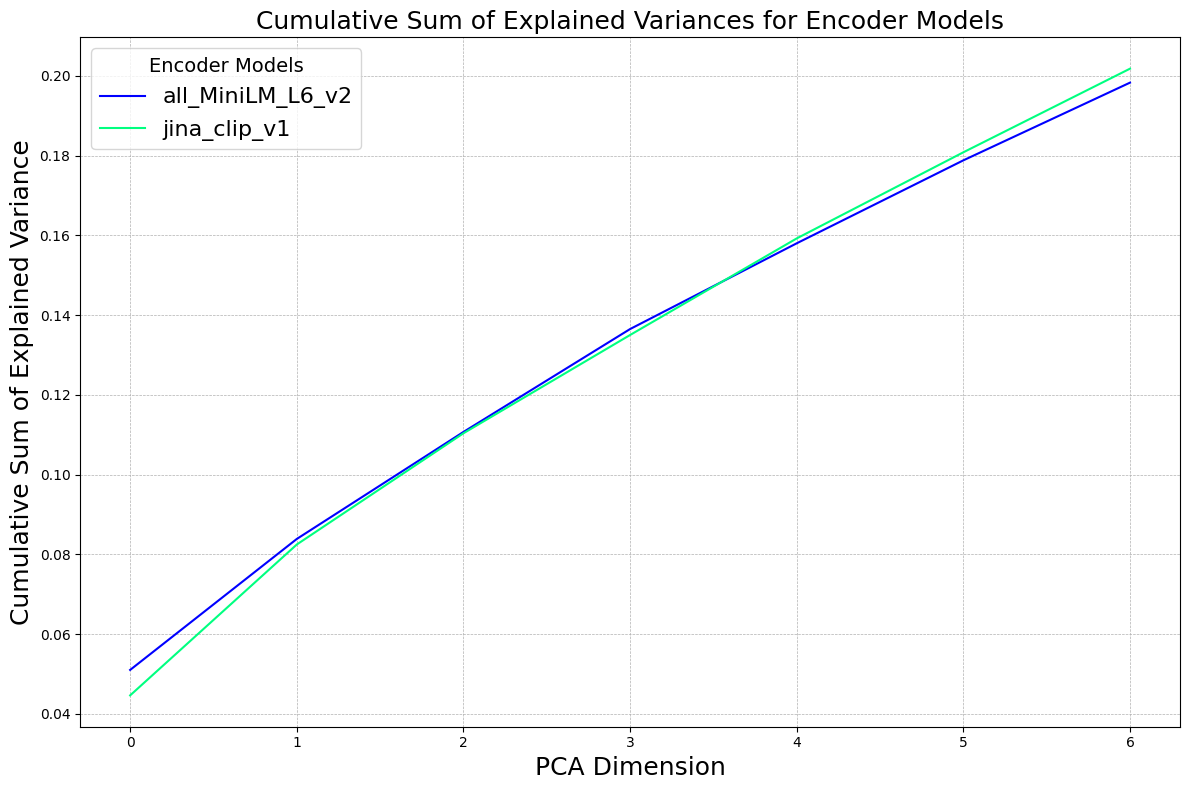

In [23]:

plot_cumulative_explained_variance(explained_variances)


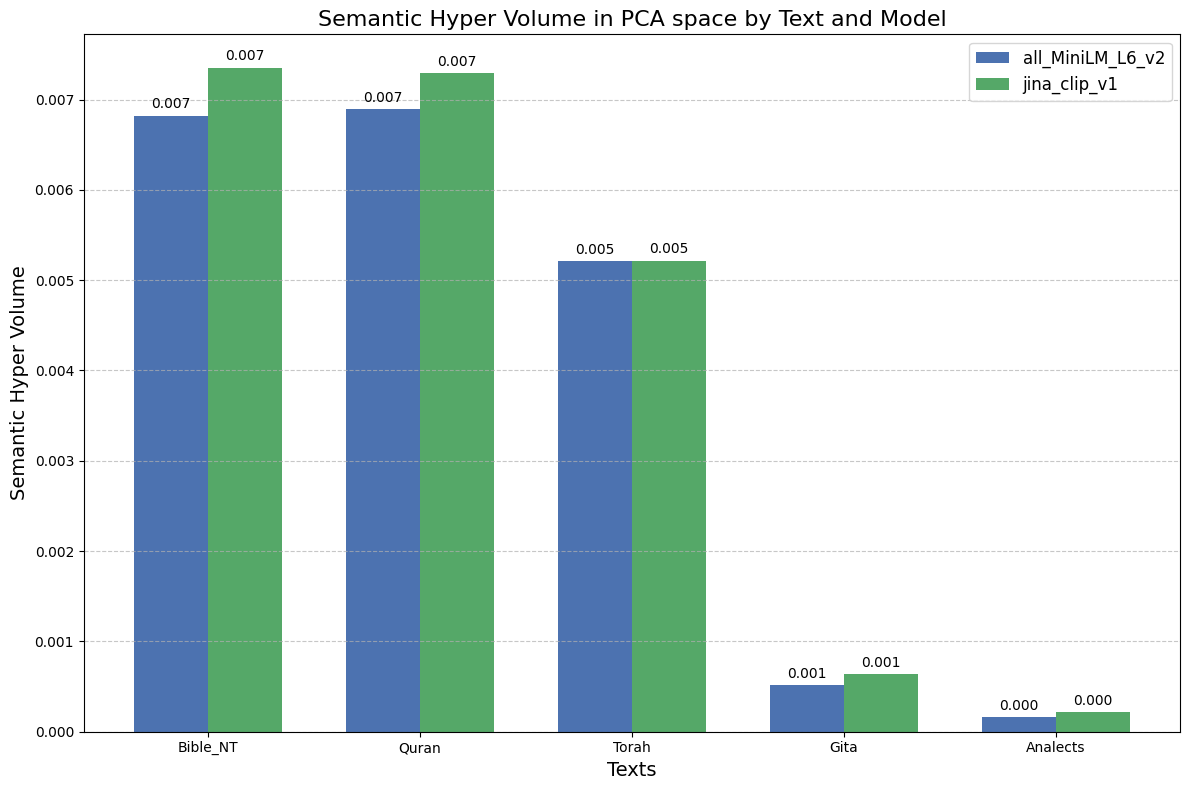

In [24]:

plot_semantic_hyper_volume_per_text(from_encoder_model_to_from_text_to_semantic_hypervolume)

In [ ]:
plot_semantic_hyper_volume_per_text_plotly(from_encoder_model_to_from_text_to_semantic_hypervolume)

In [25]:
normalized_from_encoder_model_to_from_text_to_semantic_hypervolume = normalize_per_token_size(from_encoder_model_to_from_text_to_semantic_hypervolume)

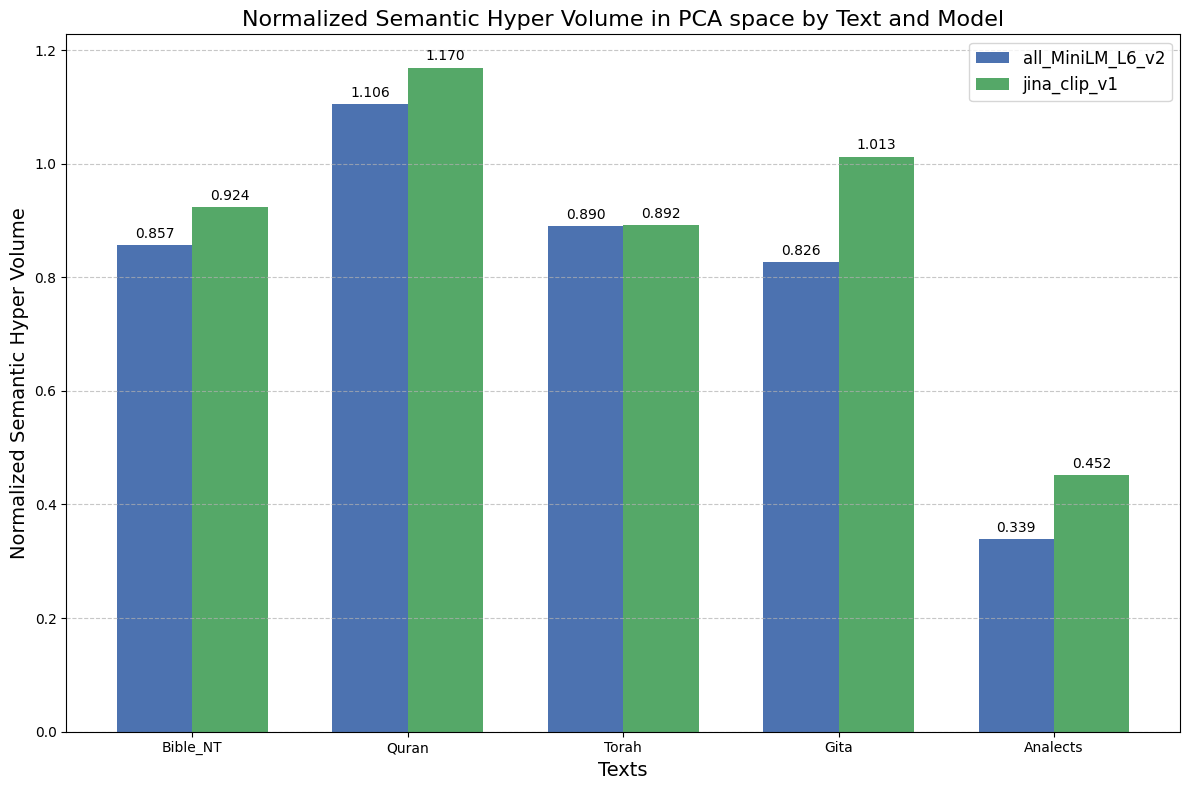

In [26]:
plot_semantic_hyper_volume_per_text(normalized_from_encoder_model_to_from_text_to_semantic_hypervolume, title= 'Normalized Semantic Hyper Volume')

In [ ]:
plot_semantic_hyper_volume_per_text_plotly(normalized_from_encoder_model_to_from_text_to_semantic_hypervolume)